In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invweibull
from scipy.stats import dweibull
import scipy.stats as stats

In [8]:
%matplotlib notebook

In [9]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(2*sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

<IPython.core.display.Javascript object>


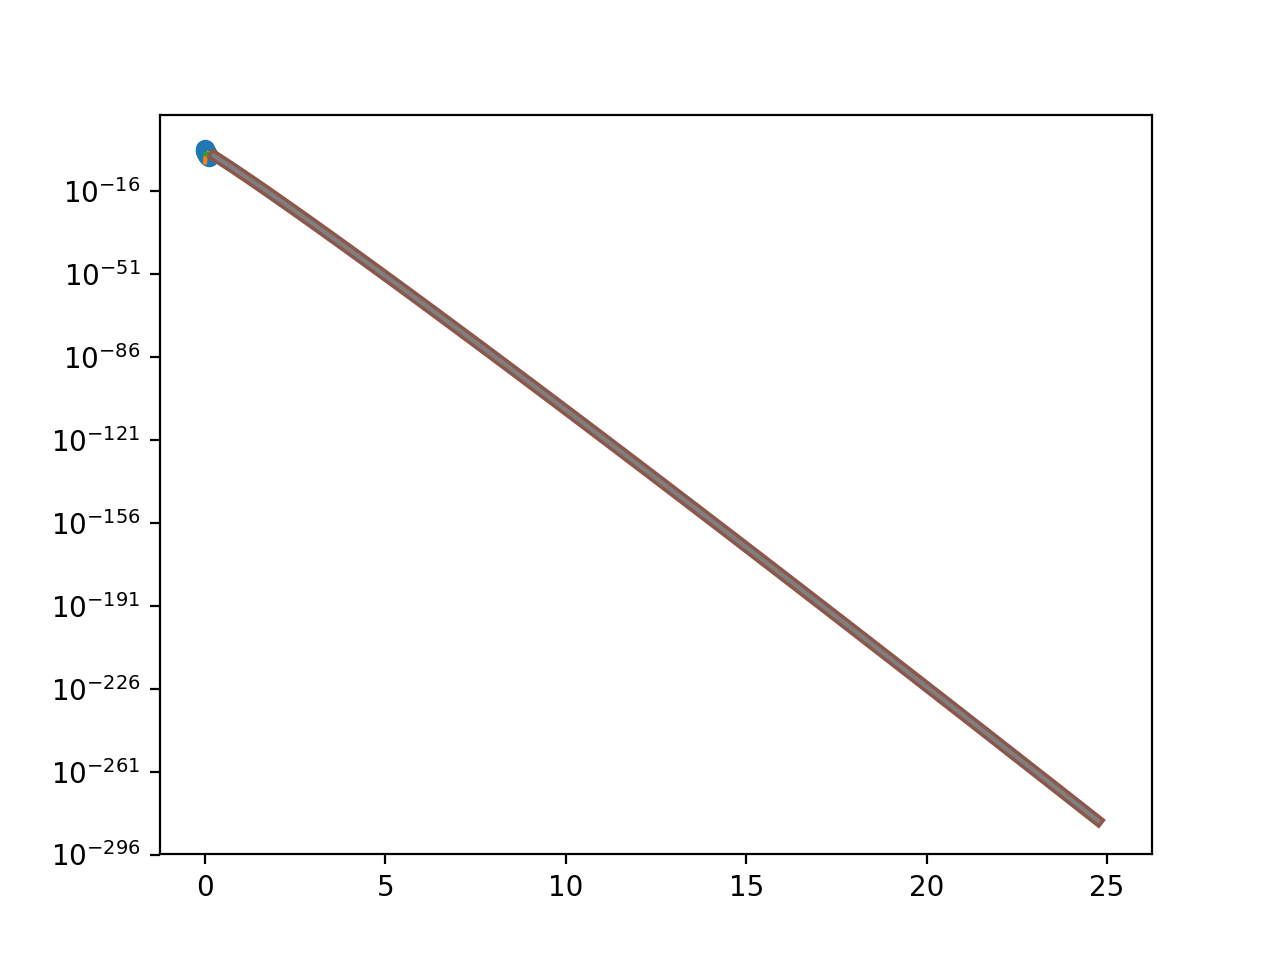

In [10]:
# Generate a trial function
sigmaW = 0.1
sigma2W = sigmaW**2
etaW = 0.8
Z2max = .1
Z2 = np.linspace(0.0001,Z2max,10)
myWeibull = Weibull(Z2,sigma2W,etaW)
plt.figure()
plt.semilogy(Z2,myWeibull,'o')

In [24]:
# Fit myWeibull(Z2) to obtain the best-fit sigmaW and etaW ...
params = stats.exponweib.fit(Z2, floc=0, f0=1)
shape = params[1]
scale = params[3]
print(shape)
print(scale)
values,bins,hist = plt.hist(Z2,bins=51,range=(0,25),normed=True)
center = (bins[:-1] + bins[1:]) / 2.
plt.plot(center,stats.exponweib.pdf(center,*params))



1.04648156565
0.0506224048166
